# Import geography data

This notebook shows how to import data from files contained in the `stroke-maps` package.

## Plain English summary

The `stroke-maps` code package comes with lots of useful data. We can load in that data and use it in other places.

The main categories of data files are:
+ Region lookup. Tables that link small geographical regions to larger ones.
+ Stroke unit services. Tables of stroke unit names and whether they provide IVT and MT.
+ Travel times. Tables of travel times from each area to each stroke unit, or between stroke units.
+ Geography. Coordinates of stroke units, or shapes that make up each various areas in England and Wales or in Northern Ireland.

Each piece of data can be imported with a single line of code. This notebook goes through each piece of data in turn and shows the line of code needed to load the data.

## Aims

The `stroke-maps` package contains various data files that link different geographies together. We will import each of these files in turn and display their contents.

## Method

The files are usually imported directly using `pandas` for tabular data or `geopandas` for geographic data. Some of the files do some extra processing beyond a straight import of the files. These are as follows:

+ Stroke unit coordinates. These are stored as a `.csv` file with a column for Easting and a column for Northing. The import functions here do an extra steps of combining the Easting and Northing columns into a new "geometry" column containing `Point` geometry, with one point of (x, y) coordinates per row of data.
+ Geometry data in general. Where necessary these are transformed to the British National Grid or Irish Grid coordinate systems.

The boundaries data are plotted quickly using matplotlib.

## Notebook setup

In [1]:
import stroke_maps.load_data

import matplotlib.pyplot as plt  # for showing geometry

## 1. Region lookup

The files available are:
+ stroke units to containing regions (England and Wales)
+ LSOA to SICBL (England) and LHB (Wales)
+ SICBL (England) and LHB (Wales) to larger regions
+ LSOA to ambulance service catchment areas (England and Wales)
+ CCG 2015 to ambulance service catchment areas (England)
+ Ambulance service codes to names (England and Wales)

__Stroke unit to region lookup:__

In [2]:
df_units = stroke_maps.load_data.stroke_unit_region_lookup()

df_units.head(3).T

postcode,SY231ER,CB20QQ,L97AL
stroke_team,Bronglais Hospital (Aberystwyth),"Addenbrooke's Hospital, Cambridge","University Hospital Aintree, Liverpool"
short_code,AB,AD,AI
ssnap_name,Bronglais Hospital,Addenbrooke's Hospital,University Hospital Aintree
use_ivt,1,1,1
use_mt,0,1,1
use_msu,0,1,1
transfer_unit_postcode,nearest,nearest,nearest
lsoa,Ceredigion 002A,Cambridge 013D,Liverpool 005A
lsoa_code,W01000512,E01017995,E01006654
region,Hywel Dda University Health Board,NHS Cambridgeshire and Peterborough ICB - 06H,NHS Cheshire and Merseyside ICB - 99A


__LSOA to region lookup:__

In [3]:
df_lsoa_regions = stroke_maps.load_data.lsoa_region_lookup()

df_lsoa_regions.head(3)

,,region,region_code,region_type
lsoa,lsoa_code,,,
Halton 007A,E01012367,NHS Cheshire and Merseyside ICB - 01F,E38000068,SICBL
Halton 003A,E01012368,NHS Cheshire and Merseyside ICB - 01F,E38000068,SICBL
Halton 005A,E01012369,NHS Cheshire and Merseyside ICB - 01F,E38000068,SICBL


__Region to region lookup:__

In [4]:
df_regions = stroke_maps.load_data.region_lookup()

df_regions.head(3)

,,region_type,short_code,country,icb,icb_code,isdn
region,region_code,,,,,,
Aneurin Bevan University Health Board,W11000028,LHB,AB,Wales,NaN,NaN,NaN
"NHS Bath and North East Somerset, Swindon and Wiltshire ICB - 92G",E38000231,SICBL,BA,England,"NHS Bath and North East Somerset, Swindon and ...",E54000040,"Gloucester, BSW, BNSSG and Somerset"
Betsi Cadwaladr University Health Board,W11000023,LHB,BC,Wales,NaN,NaN,NaN


__LSOA to ambulance service lookup:__

In [5]:
df_lsoa_ambo = stroke_maps.load_data.ambulance_lsoa_lookup()

df_lsoa_ambo.head(3)

,LSOA11NM,ambo21,ambo22
LSOA11CD,,,
E01031349,Adur 001A,SECAmb,SECAmb
E01031350,Adur 001B,SECAmb,SECAmb
E01031351,Adur 001C,SECAmb,SECAmb


__CCG 2015 to ambulance service lookup:__

In [6]:
df_ccg15_ambo = stroke_maps.load_data.ambulance_ccg15_lookup()

df_ccg15_ambo.head(3)

ccg15nm
NHS Airedale, Wharfedale and Craven CCG       YAS
NHS Ashford CCG                            SECAmb
NHS Aylesbury Vale CCG                       SCAS
Name: ambo21, dtype: object

__Ambulance service code to name lookup:__

In [7]:
df_ambo_names = stroke_maps.load_data.ambulance_name_lookup()

df_ambo_names.head(3)

ambulance_service
EMAS       East Midlands
EEAST    East of England
IWAS       Isle of Wight
Name: ambulance_service_name, dtype: object

## 2. Stroke unit services

For England and Wales, the services are contained in the stroke unit region lookup file above.

For Northern Ireland:

In [8]:
df_units_ni = stroke_maps.load_data.ni_stroke_unit_services()

df_units_ni.head(3).T

Postcode,BT126BA,BT161RH,BT358DR
Hospital_name,Royal Victoria,Ulster,Daisy Hill
City,Belfast,Belfast,Newry
door_to_needle,43,50,38
Fixed,2.0,NaN,NaN
use_ivt,1,1,0
use_mt,1,0,0


## 3. Travel times

The files available are:
+ Time from each LSOA to each stroke unit
+ Time from each stroke unit to each other stroke unit

The files are separate for England and Wales and for Northern Ireland.

### England and Wales

__LSOA to stroke unit travel time lookup:__

In [9]:
df_travel_lsoa = stroke_maps.load_data.travel_time_matrix_lsoa()

# Show the first five rows and columns:
df_travel_lsoa.iloc[:5, :5]

,B152TH,B714HJ,B95SS,BA13NG,BA214AT
LSOA,,,,,
Adur 001A,173.3,179.8,171.2,161.5,152.9
Adur 001B,173.3,179.8,172.3,161.5,152.9
Adur 001C,173.3,180.9,172.3,150.8,151.9
Adur 001D,173.3,180.9,172.3,161.5,152.9
Adur 001E,174.4,180.9,173.3,150.8,151.9


__Stroke unit to other unit travel time lookup:__

In [10]:
df_travel_units = stroke_maps.load_data.travel_time_matrix_units()

# Show the first five rows and columns:
df_travel_units.iloc[:5, :5]

,B152TH,B714HJ,B95SS,BA13NG,BA214AT
from_postcode,,,,,
B152TH,0.0,18.7,18.7,107.8,155.1
B714HJ,18.7,0.0,24.1,106.8,154.0
B95SS,19.8,23.0,0.0,115.3,162.6
BA13NG,107.8,106.8,115.3,0.0,62.7
BA214AT,155.1,154.0,162.6,62.7,0.0


### Northern Ireland

__LSOA to stroke unit travel time lookup:__

In [11]:
df_travel_ni = stroke_maps.load_data.travel_time_matrix_ni_areas()

# Show the first five rows and columns:
df_travel_ni.iloc[:5, :5]

,BT126BA,BT161RH,BT358DR,BT412RL,BT476SB
from_postcode,,,,,
N00000001,31.400562,37.852665,64.223641,19.032658,79.895643
N00000002,24.677730,37.852665,61.926859,23.292278,83.200000
N00000003,24.677730,37.852665,63.077279,20.471335,80.991077
N00000004,30.080264,42.862547,66.504588,24.677730,83.200000
N00000005,32.710168,40.372700,66.504588,16.088440,76.591575


__Stroke unit to other unit travel time lookup:__

In [12]:
df_travel_units_ni = stroke_maps.load_data.travel_time_matrix_ni_units()

# Show the first five rows and columns:
df_travel_units_ni.iloc[:5, :5]

,BT126BA,BT161RH,BT358DR,BT412RL,BT476SB
from_postcode,,,,,
BT126BA,0.000000,19.032658,52.563615,27.404887,88.400000
BT161RH,19.032658,0.000000,63.077279,35.299611,96.200000
BT358DR,51.371234,63.077279,0.000000,69.897939,117.000000
BT412RL,28.748618,35.299611,71.021910,0.000000,72.142439
BT476SB,88.400000,96.200000,117.000000,72.142439,0.000000


## 4. Geography

The files available are:
+ Stroke unit coordinates
  + England and Wales
  + Northern Ireland
+ Region boundaries
  + LSOA
  + Sub-Integrated Care Board Locations (SICBL) for England
  + Local Health Boards (LHB) for Wales
  + Integrated Stroke Delivery Networks (ISDN) for England
  + Ambulance catchment areas for England and Wales
  + Small Areas (SA) for Northern Ireland
  + Counties for Northern Ireland
  + Country outlines for:
    + England only
    + Wales only
    + England and Wales combined
    + Northern Ireland only

### Stroke unit coordinates

England and Wales:

In [13]:
gdf_unit_coords = stroke_maps.load_data.stroke_unit_coordinates()

gdf_unit_coords.head(3)

,BNG_E,BNG_N,Latitude,Longitude,geometry
postcode,,,,,
RM70AG,551110,187777,51.568622,0.178914,POINT (551110.000 187777.000)
E11BB,534833,181799,51.519026,-0.058075,POINT (534833.000 181799.000)
SW66SX,524227,176487,51.473716,-0.212722,POINT (524227.000 176487.000)


Basic plot of the coordinates:

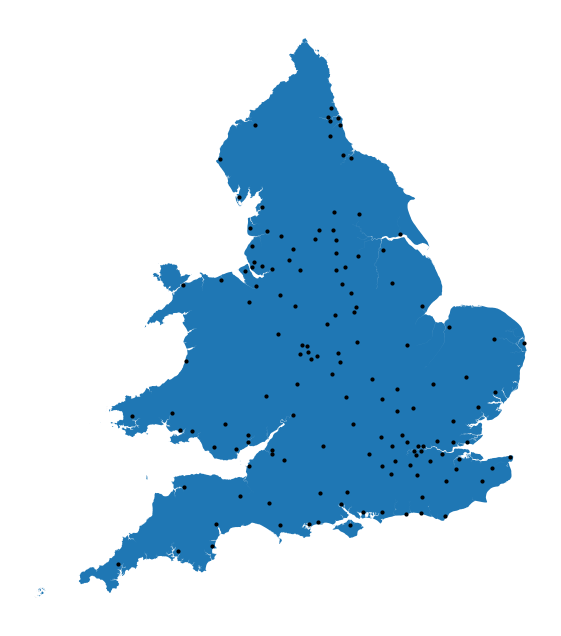

In [14]:
gdf_ew = stroke_maps.load_data.englandwales_outline()

fig, ax = plt.subplots(figsize=(8, 8))
gdf_ew.plot(ax=ax)
ax.scatter(gdf_unit_coords['BNG_E'], gdf_unit_coords['BNG_N'], color='k', s=4)
ax.axis('off')
plt.show()

Northern Ireland:

In [15]:
gdf_unit_coords_ni = stroke_maps.load_data.stroke_unit_coordinates_ni()

gdf_unit_coords_ni.head(3)

,Hospital_name,City,square_letter,square_easting,square_northing,square_ref_easting,square_ref_northing,easting,northing,geometry
Postcode,,,,,,,,,,
BT126BA,Royal Victoria,Belfast,J,32226,73709,300000,300000,332226,373709,POINT (332226.000 373709.000)
BT161RH,Ulster,Belfast,J,41440,74272,300000,300000,341440,374272,POINT (341440.000 374272.000)
BT358DR,Daisy Hill,Newry,J,7549,27085,300000,300000,307549,327085,POINT (307549.000 327085.000)


Basic plot of the coordinates:

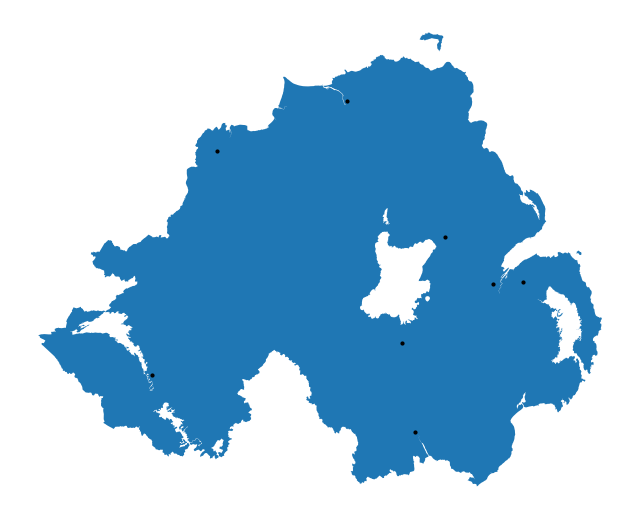

In [16]:
gdf_ni = stroke_maps.load_data.ni_outline()

fig, ax = plt.subplots(figsize=(8, 8))
gdf_ni.plot(ax=ax)
ax.scatter(gdf_unit_coords_ni['easting'], gdf_unit_coords_ni['northing'], color='k', s=4)
ax.axis('off')
plt.show()

### Region boundaries

Define this function for plotting region boundaries:

In [17]:
def plot_boundaries(gdf, title):
    """Simple plot of region boundaries."""
    fig, ax = plt.subplots(figsize=(8, 8))
    gdf['geometry'].plot(ax=ax)
    ax.axis('off')
    ax.set_title(title)
    plt.show()

__LSOA boundaries:__

In [18]:
gdf_lsoa = stroke_maps.load_data.lsoa_geography()

gdf_lsoa.head(3).T

,0,1,2
OBJECTID,1,2,3
LSOA11CD,E01000001,E01000002,E01000003
LSOA11NM,City of London 001A,City of London 001B,City of London 001C
LSOA11NMW,City of London 001A,City of London 001B,City of London 001C
BNG_E,532129,532480,532245
BNG_N,181625,181699,182036
LONG,-0.09706,-0.09197,-0.09523
LAT,51.5181,51.51868,51.52176
Shape__Area,157794.481079,164882.427628,42219.805717
Shape__Length,1685.391778,1804.828196,909.223277


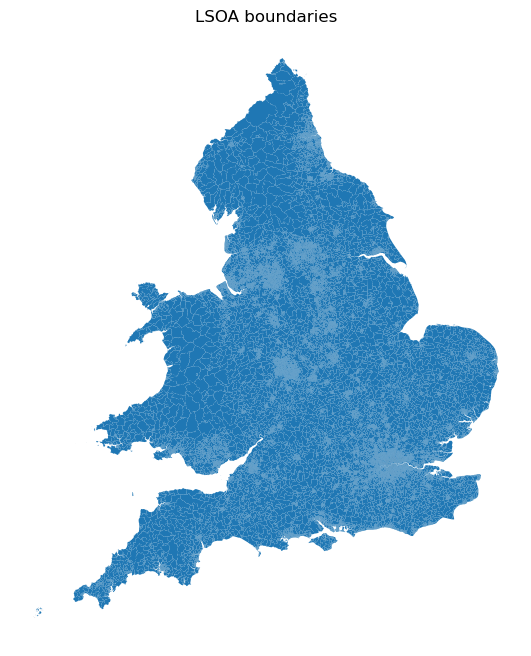

In [19]:
plot_boundaries(gdf_lsoa, 'LSOA boundaries')

__Sub-Integrated Care Board Locations (England) boundaries:__

In [20]:
gdf_sicbl = stroke_maps.load_data.sicbl_geography()

gdf_sicbl.head(3).T

,0,1,2
SICBL22CD,E38000006,E38000007,E38000008
SICBL22NM,NHS South Yorkshire ICB - 02P,NHS Mid and South Essex ICB - 99E,NHS Nottingham and Nottinghamshire ICB - 02Q
BNG_E,429979,564014,468073
BNG_N,403330,194421,384833
LONG,-1.54925,0.368068,-0.9787
LAT,53.5258,51.6247,53.35602
OBJECTID,1,2,3
GlobalID,7d3f8714-885f-41e3-b573-a3da2d523e75,0f2900d4-c813-49f0-b319-7589b4b54cfc,9c0c5221-96d2-4419-a56a-ea321b3c1511
geometry,"POLYGON ((443219.66 409833.09, 444697.051 4070...","POLYGON ((577495.812 194112.5, 576648.002 1917...","POLYGON ((479948.585 396038.289999999, 478445...."


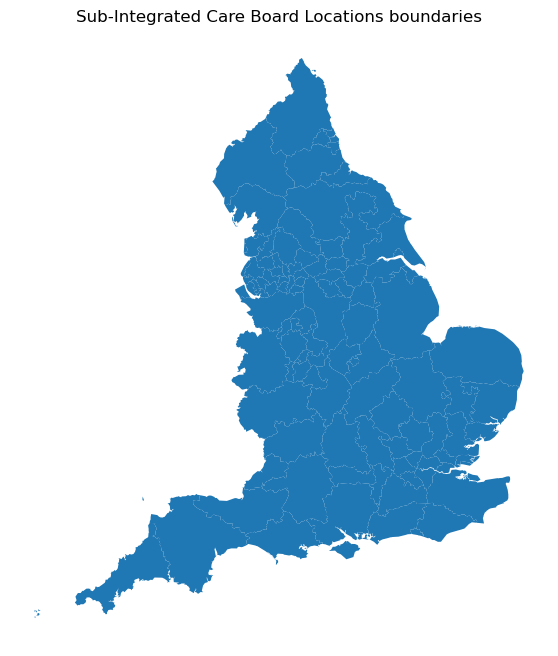

In [21]:
plot_boundaries(gdf_sicbl, 'Sub-Integrated Care Board Locations boundaries')

__Local Health Board (Wales) boundaries:__

In [22]:
gdf_lhb = stroke_maps.load_data.lhb_geography()

gdf_lhb.head(3).T

,0,1,2
OBJECTID,1,2,3
LHB20CD,W11000023,W11000024,W11000025
LHB20NM,Betsi Cadwaladr University Health Board,Powys Teaching Health Board,Hywel Dda University Health Board
LHB20NMW,Bwrdd Iechyd Prifysgol Betsi Cadwaladr,Bwrdd Iechyd Addysgu Powys,Bwrdd Iechyd Prifysgol Hywel Dda
BNG_E,282470,302328,250540
BNG_N,346124,273254,245213
LONG,-3.75275,-3.43533,-4.18274
LAT,52.99951,52.34863,52.08504
GlobalID,1b0c205c-c731-4c8c-bbf1-f2a32ffead10,bcce2d1f-465a-4188-8d98-cddb0d420ca6,477edbf9-ed04-464f-b9e8-838937b75ff0
geometry,"MULTIPOLYGON (((270269.0013 319142.795700001, ...","POLYGON ((322891.6032 333139.2992, 323007.6029...","MULTIPOLYGON (((197655.1992 193343.6987, 19765..."


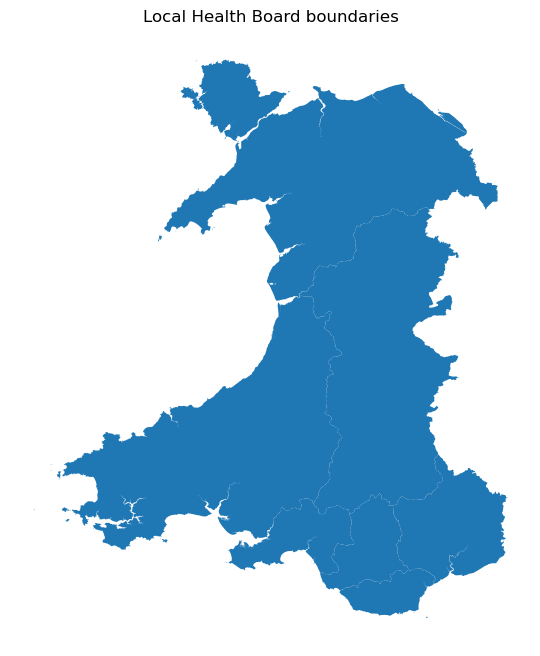

In [23]:
plot_boundaries(gdf_lhb, 'Local Health Board boundaries')

__Integrated Stroke Delivery Network (England) boundaries:__

In [24]:
gdf_isdn = stroke_maps.load_data.isdn_geography()

gdf_isdn.head(3).T

,0,1,2
isdn,Cheshire and Merseyside,"Devon, Cornwall and Isles of Scilly",East Midlands
geometry,"POLYGON ((379198.89 384550.021, 380330.5 38356...",MULTIPOLYGON (((87767.5686999997 8868.28480000...,"POLYGON ((501950.096 305791.095000001, 503614...."


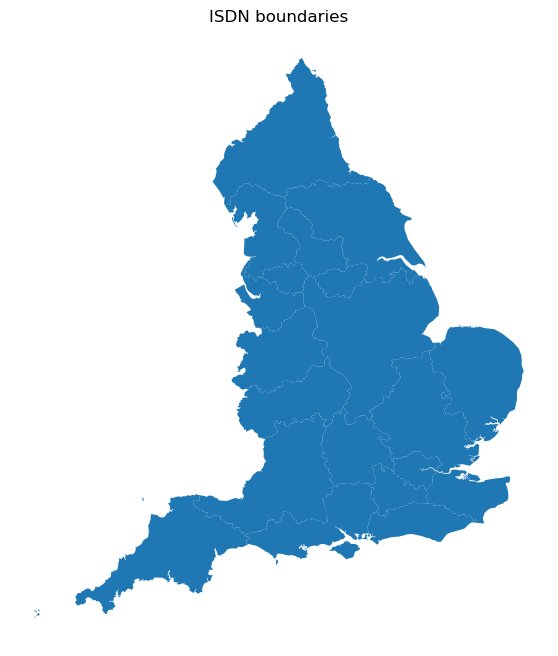

In [25]:
plot_boundaries(gdf_isdn, 'ISDN boundaries')

__Ambulance service (England and Wales) boundaries:__

2021 data:

In [26]:
gdf_ambo21 = stroke_maps.load_data.ambulance21_geography()

gdf_ambo21.head(3)

,ambo21,geometry
0,EEAST,"MULTIPOLYGON (((504078.594 192959.141, 504011...."
1,EMAS,"MULTIPOLYGON (((433452.973 296575.368, 432482...."
2,IWAS,"MULTIPOLYGON (((450897.496 75508.595, 450613.3..."


2022 data:

In [27]:
gdf_ambo22 = stroke_maps.load_data.ambulance22_geography()

gdf_ambo22.head(3)

,ambo22,geometry
0,EEAST,"MULTIPOLYGON (((504078.594 192959.141, 504011...."
1,EMAS,"MULTIPOLYGON (((427187.406 311340.906, 427226...."
2,IWAS,"MULTIPOLYGON (((450897.496 75508.595, 450613.3..."


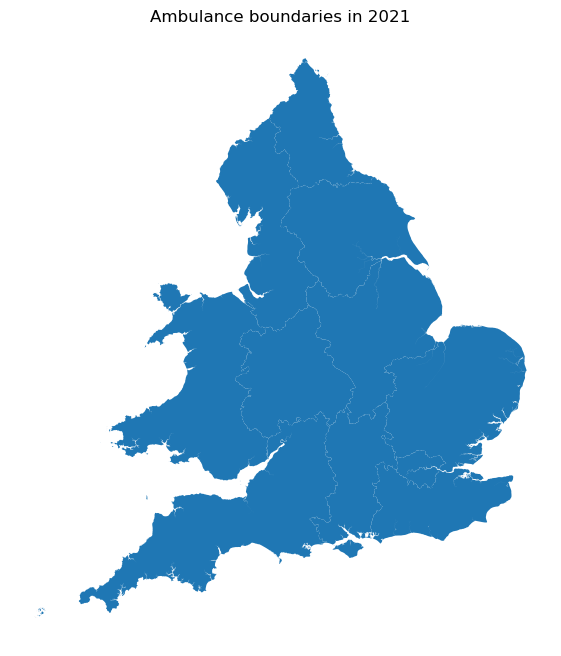

In [28]:
plot_boundaries(gdf_ambo21, 'Ambulance boundaries in 2021')

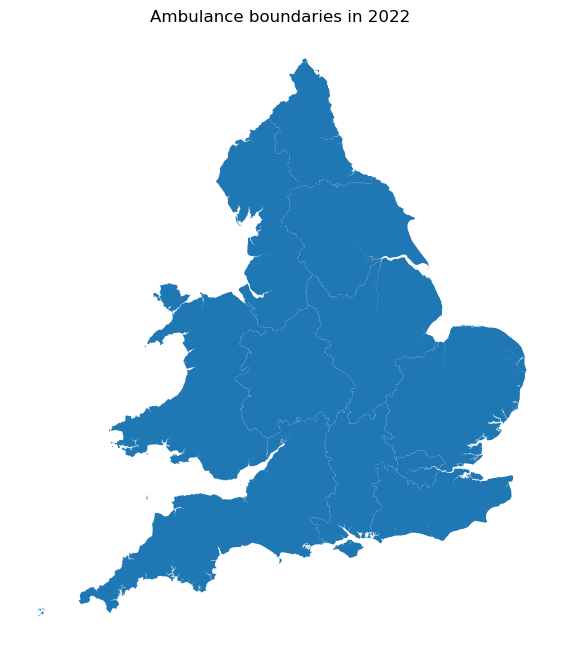

In [29]:
plot_boundaries(gdf_ambo22, 'Ambulance boundaries in 2022')

__Small Area (SA) (Northern Ireland) boundaries:__

In [30]:
gdf_sa = stroke_maps.load_data.ni_sa_geography()

gdf_sa.head(3).T

,0,1,2
OBJECTID,1,2,3
SA2011,N00000002,N00000004,N00000007
SOA2011,95AA01S2,95AA01S2,95AA01S3
X_COORD,315465,307147,314461
Y_COORD,377176,376182,383440
Hectares,169.044,8700.04,1287.99
Shape_Leng,8476.858446,46727.719482,21817.292006
Shape_Area,1690435.75048,87000415.751,12879949.2189
Code_all,N00000002,N00000004,N00000007
geometry,"POLYGON ((315481.125 376464.2188000008, 315524...","POLYGON ((307740.8125 382573.2188000008, 30407...","POLYGON ((311363.3125 385217.625, 311325.09379..."


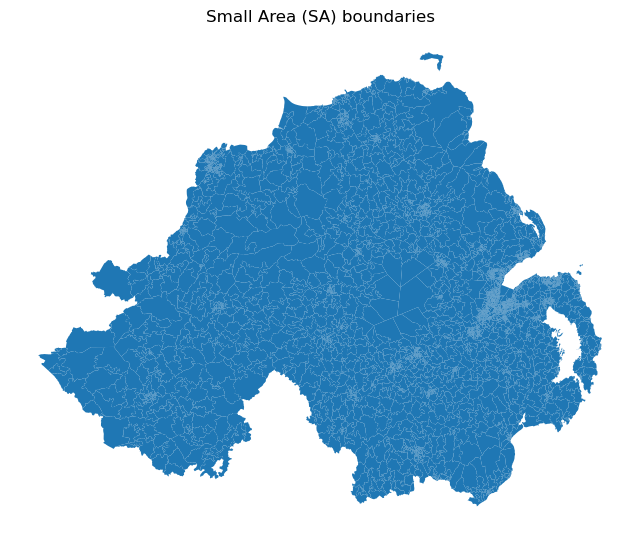

In [31]:
plot_boundaries(gdf_sa, 'Small Area (SA) boundaries')

__County (Northern Ireland) boundaries:__

In [32]:
gdf_ni_county = stroke_maps.load_data.ni_county_geography()

gdf_ni_county.head(3).T

,0,1,2
CountyName,ANTRIM,ARMAGH,DOWN
OBJECTID,1,2,3
geometry,MULTIPOLYGON (((-5.721374931341753 54.85001055...,POLYGON ((-6.454896442115531 54.56187280439839...,MULTIPOLYGON (((-5.627981854889702 54.67902282...


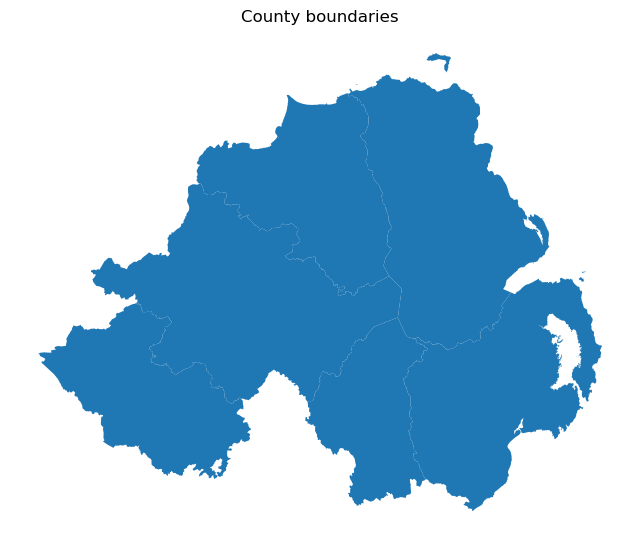

In [33]:
plot_boundaries(gdf_ni_county, 'County boundaries')

### Country outlines

In [34]:
gdf_england = stroke_maps.load_data.england_outline()

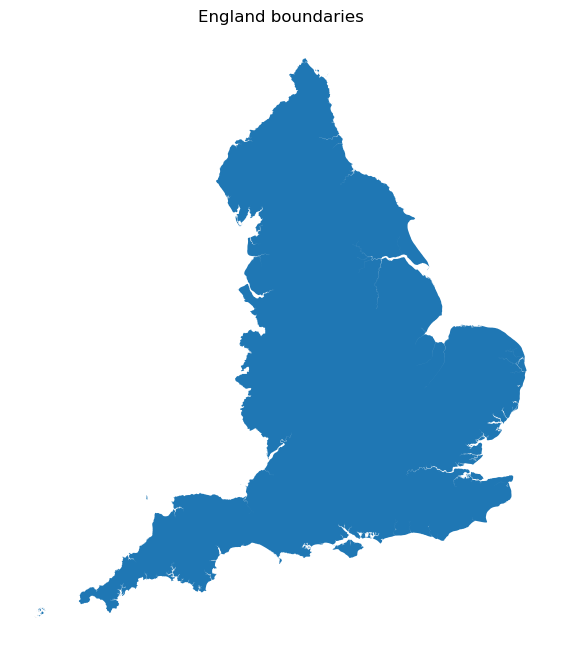

In [35]:
plot_boundaries(gdf_england, 'England boundaries')

In [36]:
gdf_wales = stroke_maps.load_data.wales_outline()

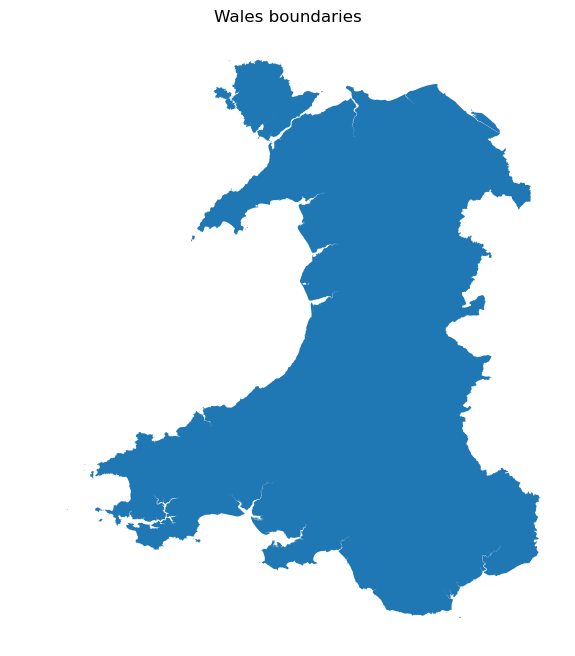

In [37]:
plot_boundaries(gdf_wales, 'Wales boundaries')

In [38]:
gdf_englandwales = stroke_maps.load_data.englandwales_outline()

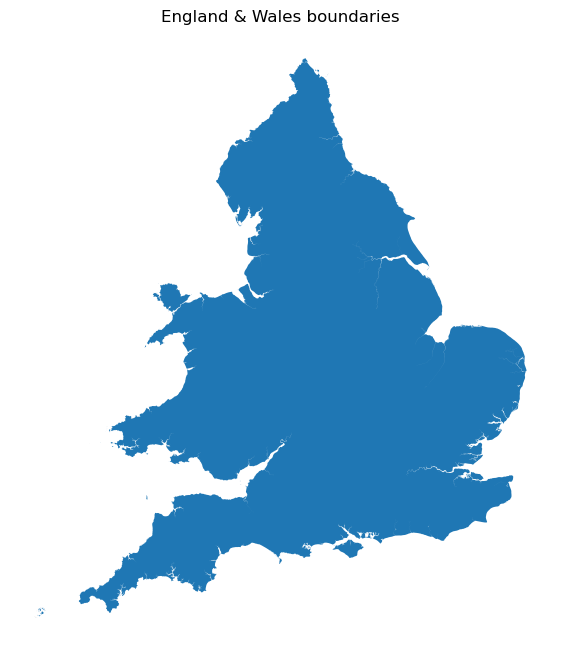

In [39]:
plot_boundaries(gdf_englandwales, 'England & Wales boundaries')

In [40]:
gdf_ni = stroke_maps.load_data.ni_outline()

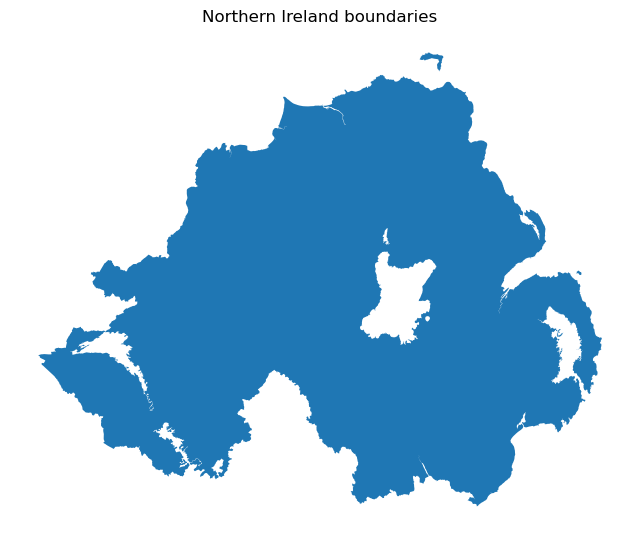

In [41]:
plot_boundaries(gdf_ni, 'Northern Ireland boundaries')

## Conclusion

We have shown how to import data from the `stroke-maps` package.